In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. It was mentioned in this chapter that a cubic regression spline with
one knot at ξ can be obtained using a basis of the form x, x2, x3,
(x − ξ)3 +, where (x − ξ)3 + = (x − ξ)3 if x > ξ and equals 0 otherwise.
We will now show that a function of the form
f(x) = β0 + β1x + β2x2 + β3x3 + β4(x − ξ)3 +
is indeed a cubic regression spline, regardless of the values of β0, β1, β2,
β3, β4.

(a) Find a cubic polynomial
f1(x) = a1 + b1x + c1x2 + d1x3
such that f(x) = f1(x) for all x ≤ ξ. Express a1, b1, c1, d1 in
terms of β0, β1, β2, β3, β4.

(b) Find a cubic polynomial
f2(x) = a2 + b2x + c2x2 + d2x3
such that f(x) = f2(x) for all x > ξ. Express a2, b2, c2, d2 in
terms of β0, β1, β2, β3, β4. We have now established that f(x) is
a piecewise polynomial.

(c) Show that f1(ξ) = f2(ξ). That is, f(x) is continuous at ξ.

(d) Show that f1′(ξ) = f2′(ξ). That is, f′(x) is continuous at ξ.

(e) Show that f1′′(ξ) = f2′′(ξ). That is, f′′(x) is continuous at ξ

<img src='images/ch07_1.jpg' width=400>

2. Suppose that a curve gˆ is computed to smoothly fit a set of n points
using the following formula:
gˆ = arg min
g (∑i=1 n (yi − g(xi))2 + λ ∫ [g(m)(x)]2 dx) ,
where g(m) represents the mth derivative of g (and g(0) = g). Provide
example sketches of gˆ in each of the following scenarios.

(a) λ = ∞, m = 0.

(b) λ = ∞, m = 1.

(c) λ = ∞, m = 2.

(d) λ = ∞, m = 3.

(e) λ = 0, m = 3.

<img src='images/ch07_2.jpg' width=400>

3. Suppose we fit a curve with basis functions b1(X) = X, b2(X) =
(X − 1)2I(X ≥ 1). (Note that I(X ≥ 1) equals 1 for X ≥ 1 and 0
otherwise.) We fit the linear regression model
Y = β0 + β1b1(X) + β2b2(X) + ϵ,
and obtain coefficient estimates βˆ0 = 1, βˆ1 = 1, βˆ2 = −2. Sketch the
estimated curve between X = −2 and X = 2. Note the intercepts,
slopes, and other relevant information.

In [1]:
B0 = 1
B1 = 1
B2 = -2
def y(x):
    if x>=1:
        return B0 + B1 * x + (x-1)**2 * B2
    else:
        return B0 + B1 * x

In [12]:
X = np.linspace(-2,2,100)
Y = np.array([y(x) for x in X])

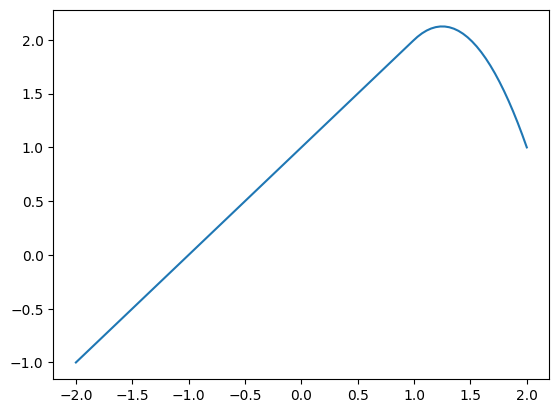

In [14]:
plt.plot(X,Y)

4. Suppose we fit a curve with basis functions b1(X) = I(0 ≤ X ≤ 2) −
(X −1)I(1 ≤ X ≤ 2), b2(X) = (X −3)I(3 ≤ X ≤ 4)+ I(4 < X ≤ 5).
We fit the linear regression model
Y = β0 + β1b1(X) + β2b2(X) + ϵ,
and obtain coefficient estimates βˆ0 = 1, βˆ1 = 1, βˆ2 = 3. Sketch the
estimated curve between X = −2 and X = 6. Note the intercepts,
slopes, and other relevant information.

In [15]:
B0 = 1
B1 = 1
B2 = 3
def indicator(x,a,b):
    return x >= a and x<=b
def y2(x):
    return B0 + B1 * (indicator(x,0,2) - (x-1)*indicator(x,1,2)) + B2 * ((x-3)*indicator(x,3,4) + (x>4 and x<=5))

In [16]:
X = np.linspace(-2,6,100)
y = np.array([y2(x) for x in X])

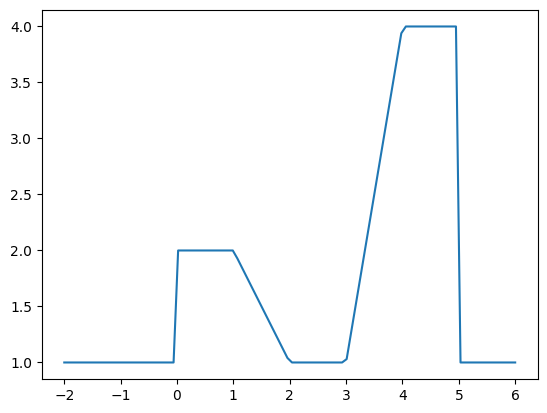

In [17]:
plt.plot(X,y)

5. Consider two curves, gˆ1 and gˆ2, defined by
gˆ1 = arg min
g (∑i=1 n (yi − g(xi))2 + λ ∫ [g(3)(x)]2 dx) ,
gˆ2 = arg min
g (∑i=1 n (yi − g(xi))2 + λ ∫ [g(4)(x)]2 dx) ,
where g(m) represents the mth derivative of g.

(a) As λ → ∞, will gˆ1 or gˆ2 have the smaller training RSS?

- g2 because it fits to training data better.

(b) As λ → ∞, will gˆ1 or gˆ2 have the smaller test RSS?

- g1 because g2 might be too smooth and have higher bias that result in overfit to the data.

(c) For λ = 0, will gˆ1 or gˆ2 have the smaller training and test RSS?

- The same because the penalty will be the same.